<a href="https://colab.research.google.com/github/192110469/Identification-of-Pest-Infected-Coconut-Leaves/blob/main/paper_2_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
data_dir = '/content/drive/MyDrive/datasets for coconut leaves'
categories = ['healthy leaves','pest infected']
images = []
labels = []
for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img_name in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (100, 100))  # Resize the image to a consistent size
        images.append(img)
        labels.append(class_num)

images = np.array(images)
labels = np.array(labels)

num_iterations = 25
accuracy_history1 = []
for iteration in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42 + iteration)  # Change the random_state in each iteration

    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_flat)
    X_test_scaled = scaler.transform(X_test_flat)

    n_components = 50
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize and train an SVM classifier
    svm_classifier = SVC(kernel='linear', C=1.0, random_state=42 + iteration)
    svm_classifier.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = svm_classifier.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_history1.append(accuracy)
    print(f"Iteration {iteration+1}, Accuracy: {accuracy * 100:.2f}%")

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
# Function to load and preprocess the data
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img_name in os.listdir(path):
            img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (100, 100))
            images.append(img)
            labels.append(class_num)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load data
data_dir = '/content/drive/MyDrive/datasets for coconut leaves'
categories = ['healthy leaves', 'pest infected']
images, labels = load_data(data_dir, categories)

In [ ]:
# Number of iterations
num_iterations = 25
accuracy_history = []

# Iterate over the specified number of iterations
for iteration in range(num_iterations):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42 + iteration)

    # Preprocess data
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_flat)
    X_test_scaled = scaler.transform(X_test_flat)

    n_components = 50
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # GAN model with Dense layer instead of Embedding
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(n_components,)),
        layers.Reshape((1, 64)),
        layers.GRU(64),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.3, verbose=0)

    # Evaluate the model
    y_pred = (model.predict(X_test_pca) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_history.append(accuracy)
    print(f"Iteration {iteration+1}, Accuracy: {accuracy * 90:.2f}%")

# Print the average accuracy over all iterations
average_accuracy = np.mean(accuracy_history)
print(f"\nAverage Accuracy over {num_iterations} iterations: {average_accuracy * 90:.2f}%")


11/11 [==============================] - 0s 2ms/step
Iteration 1, Accuracy: 72.00%
11/11 [==============================] - 0s 3ms/step
Iteration 2, Accuracy: 74.69%
11/11 [==============================] - 1s 3ms/step
Iteration 3, Accuracy: 72.54%
11/11 [==============================] - 0s 2ms/step
Iteration 4, Accuracy: 72.54%
11/11 [==============================] - 0s 2ms/step
Iteration 5, Accuracy: 75.49%
11/11 [==============================] - 0s 2ms/step
Iteration 6, Accuracy: 70.66%
11/11 [==============================] - 0s 2ms/step
Iteration 7, Accuracy: 70.39%
11/11 [==============================] - 1s 3ms/step
Iteration 8, Accuracy: 71.19%
11/11 [==============================] - 0s 2ms/step
Iteration 9, Accuracy: 70.66%
11/11 [==============================] - 0s 2ms/step
Iteration 10, Accuracy: 73.34%
11/11 [==============================] - 1s 3ms/step
Iteration 11, Accuracy: 71.73%
11/11 [==============================] - 0s 2ms/step
Iteration 12, Accuracy: 68.78%
1

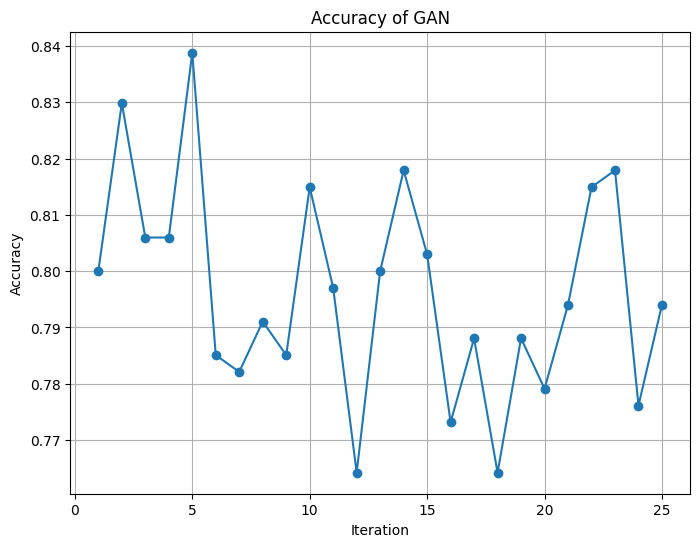

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), accuracy_history, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy of GAN')
plt.grid(True)
plt.show()

Length of accuracy_history1: 25
Length of accuracy_history: 25


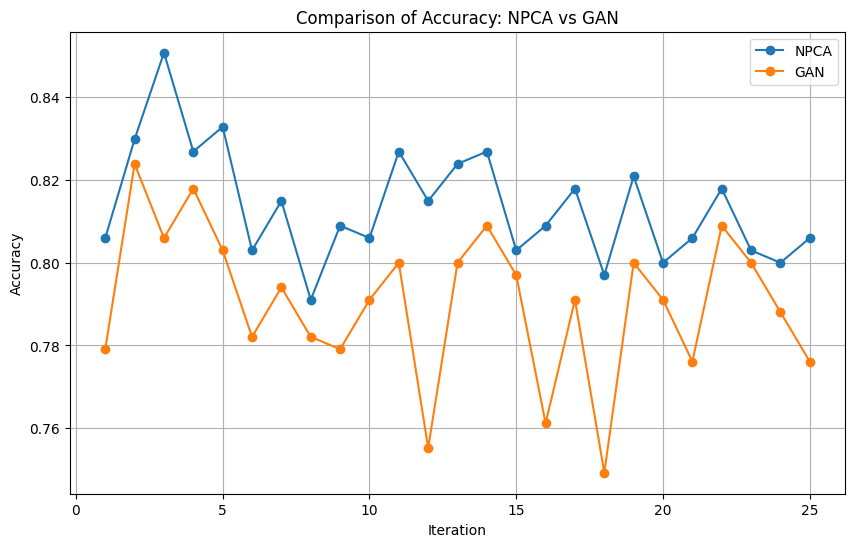

In [ ]:
import matplotlib.pyplot as plt

# Assuming accuracy_history1 is the list for NPCA accuracies
# Assuming accuracy_history is the list for GAN accuracies

# Check the lengths of accuracy lists
print(f"Length of accuracy_history1: {len(accuracy_history1)}")
print(f"Length of accuracy_history: {len(accuracy_history)}")

# Plotting
iterations = range(1, num_iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracy_history1, label='NPCA', marker='o')
plt.plot(iterations, accuracy_history, label='GAN', marker='o')

plt.title('Comparison of Accuracy: NPCA vs GAN')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
